# The Buffon's Needle Problem

In [1]:
#Running this cell displays a button to toggle hidden code
#From: http://chris-said.io/2016/02/13/how-to-make-polished-jupyter-presentations-with-optional-code-visibility/

from IPython.display import HTML

HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }
  
  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

Buffon's Needle is one of the oldest problems in geometric probability, originating in 1777.

Through this problem, it is possible to estimate the value of $\pi$ by dropping needles of length $l$ on a sheet of paper that has parallel lines a distance of $d$ apart. Buffon calculated that the probability $P$ of the dropped needle crossing one of the lines on the paper to be the following, when $l$ is less than $d$:

\begin{equation*}
P ≈ \frac{2l}{\pi d}
\end{equation*}

![Buffon Needle Diagram](https://github.com/Ariel-VB/Buffons-Needle/blob/master/BuffonNeedle.gif?raw=true)

If you are interested in seeing this experiment performed in real life, please watch this video on the Buffon's Needle problem by Numberphile. It also includes a proof of where the equation for $P$ comes from using calculus.

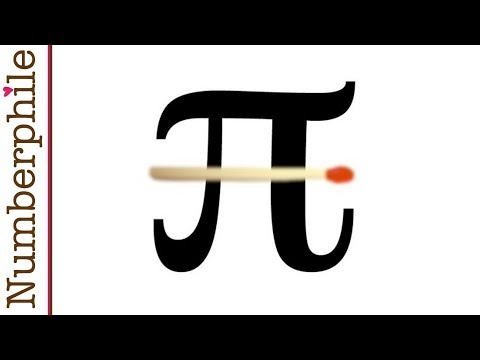

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('sJVivjuMfWA')

Since $P ≈ \frac{2l}{\pi d}$, that means $\pi$ can be approximated as $\pi ≈ \frac {2l}{Pd}$.

Now we can use a Monte Carlo simulation in order to estimate $\pi$. This means that we can estimate $P$ by performing the experiment and dropping needles on a page to count what fraction of them intersect with a line, and then use that estimate to calculate $\pi$ from the equation $\pi ≈ \frac {2l}{Pd}$. The more tests we run (i.e. the more needles we drop), the more accurate our estimate of $P$ will be, and by extension, our estimate of $\pi$.

### Try it yourself! Use the cell below to run the experiment for $n$ needles of length $l$, with $d = 1$.

If you choose a large number for $n$, don't worry if the graph doesn't show up right away! It takes a while to drop that many needles.

How many needles would you like to drop? Please choose a number between 1 and 1000: 100
What length would you like the needles to be? 1


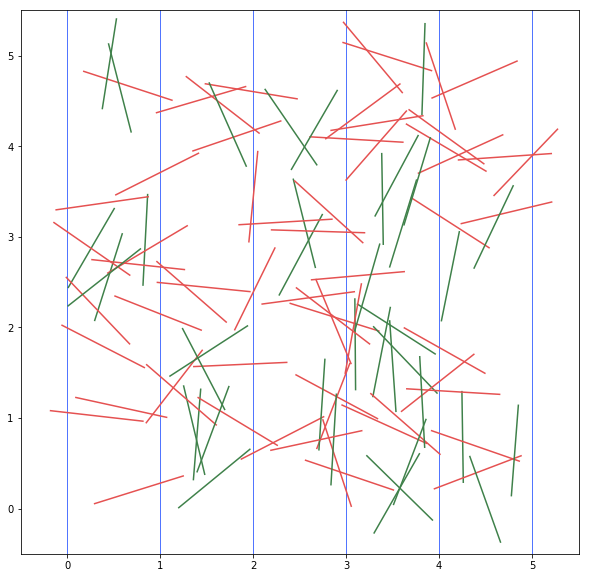

61 needles intersect with a line, and 39 do not.

61.0% of the needles intersect with a line. The chance predicted by the formula is 63.662%.

Estimating pi using this experiment gives: 3.278688524590164
This estimate differs from pi by approximately 0.137.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random as rand

%matplotlib inline

#Asking for user input on number of trials:
trials = int(input("How many needles would you like to drop? Please choose a number between 1 and 1000: "))

while trials < 1 or trials > 1000:
    
    trials = int(input("Please enter a number greater than 0 and less than 1000: "))

length = float(input("What length would you like the needles to be? "))

while length > 1 or length <= 0:
    
    length = float(input("Please choose a length less than 1 and greater than 0: "))

fig, ax = plt.subplots(figsize=(10, 10))
ax.grid(axis='x', color = "#2653FF")

color = ""
crossed = 0
not_crossed = 0

#Generating and plotting needles:
for n in range(0, trials):
    
    #Generating the center point and angle of the needle:
    center_x = rand.uniform(0,5)
    center_y = rand.uniform(0,5)
    angle = np.radians(rand.uniform(0,180))
    
    #Calculating the endpoints of the needle:
    x1 = center_x - (np.sin(angle)*.5*length)
    x2 = center_x + (np.sin(angle)*.5*length)
    
    y1 = center_y - (np.cos(angle)*.5*length)
    y2 = center_y + (np.cos(angle)*.5*length)
    
    horiz = np.linspace(x1, x2)
    vert = np.linspace(y1, y2)
    
    #Checking if the needle crosses a line:
    if x1 < 0 < x2 or x1 > 0 > x2 or x1 < 1 < x2 or x1 > 1 > x2 or x1 < 2 < x2 or x1 > 2 > x2 or x1 < 3 < x2 or x1 > 3 > x2 \
    or x1 < 4 < x2 or x1 > 4 > x2 or x1 < 5 < x2 or x1 > 5 > x2:
        
        color = "#E55151"
        crossed += 1
        
    else:
        
        color = "#3F814A"
        not_crossed += 1
    
    #Plotting the needle
    plt.plot(horiz,vert,color = color)

plt.xlim(-.5,5.5)
plt.ylim(-.5,5.5)
plt.show()

print(f"{crossed} needles intersect with a line, and {not_crossed} do not.\n")

chance = crossed/trials
calc_chance = 2*length/np.pi
calc_pi = 2*length/chance
difference = abs(np.pi - calc_pi)

print(f"{round(chance*100, 3)}% of the needles intersect with a line. The chance predicted by the formula is {round(calc_chance*100, 3)}%.")
print()
print(f"Estimating pi using this experiment gives: {calc_pi}")
print(f"This estimate differs from pi by approximately {round(difference, 3)}.")

### Now let's try dropping more needles to get an even better estimate of $\pi$!

The cell below will run the same experiment, but will not print the graph to save run time. Try choosing a value of $n$ greater than 1000.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import random as rand

#Asking for user input on number of trials:
trials = int(input("How many needles would you like to drop? "))

while trials < 1:
    
    trials = int(input("Please enter a number greater than 0: "))

length = float(input("What length would you like the needles to be? "))

while length > 1 or length <= 0:
    
    length = float(input("Please choose a length less than 1 and greater than 0: "))

crossed = 0
not_crossed = 0

#Generating and plotting needles:
for n in range(0, trials):
    
    #Generating the center point and angle of the needle:
    center_x = rand.uniform(0,5)
    center_y = rand.uniform(0,5)
    angle = np.radians(rand.uniform(0,180))
    
    #Calculating the endpoints of the needle:
    x1 = center_x - (np.sin(angle)*.5*length)
    x2 = center_x + (np.sin(angle)*.5*length)
    
    y1 = center_y - (np.cos(angle)*.5*length)
    y2 = center_y + (np.cos(angle)*.5*length)

    
    #Checking if the needle crosses a line:
    if x1 < 0 < x2 or x1 > 0 > x2 or x1 < 1 < x2 or x1 > 1 > x2 or x1 < 2 < x2 or x1 > 2 > x2 or x1 < 3 < x2 or x1 > 3 > x2 \
    or x1 < 4 < x2 or x1 > 4 > x2 or x1 < 5 < x2 or x1 > 5 > x2:
        
        crossed += 1
        
    else:

        not_crossed += 1

print()
print(f"{crossed} needles intersect with a line, and {not_crossed} do not.\n")

chance = crossed/trials
calc_chance = 2*length/np.pi
calc_pi = 2*length/chance
difference = abs(np.pi - calc_pi)

print(f"{round(chance*100, 3)}% of the needles intersect with a line. The chance predicted by the formula is {round(calc_chance*100, 3)}%.")
print()
print(f"Estimating pi using this experiment gives: {calc_pi}")
print(f"This estimate differs from pi by approximately {round(difference, 5)}.")

How many needles would you like to drop? 10000
What length would you like the needles to be? 1

6376 needles intersect with a line, and 3624 do not.

63.76% of the needles intersect with a line. The chance predicted by the formula is 63.662%.

Estimating pi using this experiment gives: 3.136762860727729
This estimate differs from pi by approximately 0.00483.


**Sources:**

http://mathworld.wolfram.com/BuffonsNeedleProblem.html

https://mste.illinois.edu/activity/buffon/

https://www.youtube.com/watch?v=sJVivjuMfWA